<a href="https://colab.research.google.com/github/Anoushehm/intro-ml-course-winter2026/blob/main/3_HAD5017_S26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='#2a9d8f' size=5> Datathon#01 </font>

- Group number: Group 3
- Members: Zahrah Rafique, Anousheh Anousheh, Yalin Mu
- Research question: How risk factors such as physical activity and eating habits predict the likelihood of adult individuals to be obesse


In [ ]:
# Upload the CSV file to Google Colab
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

Saving Datathon_1_Dataset_2.csv to Datathon_1_Dataset_2.csv


In [ ]:
# Read the dataset into a Pandas DataFrame
data = pd.read_csv("Datathon_1_Dataset_2.csv")
data.head()


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
#Check for missing values
data.isnull().sum()


,0
Age,0
Gender,0
Calorie_Intake,0
Sugar_Intake,0
Physical_Activity,0
Fast_Food_Frequency,0
Screen_Time,0
Height,0
Weight,0
BMI,0


In [ ]:
#Verifying the ranges in the variables
data.describe()
#Data shows especially the STD that measurment units need to be scaled properly. For KNN Eucledian, the calorie function would dominate while height would minimize (since the formula requires squaring)

,Age,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
count,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000
mean,48.532993,2495.845634,64.824559,89.496707,2.018441,5.486127,1.650279,70.019142,26.127641
std,17.872736,577.798752,32.004657,52.120810,1.414634,3.454036,0.119714,15.016866,6.875510
min,18.000000,1500.000000,10.000000,0.000000,0.000000,0.000000,1.196086,10.010016,3.442184
25%,33.000000,1991.000000,37.000000,45.000000,1.000000,2.000000,1.569815,59.859242,21.337576
50%,48.000000,2495.000000,65.000000,90.000000,2.000000,6.000000,1.650122,70.022501,25.661507
75%,64.000000,2994.000000,93.000000,135.000000,3.000000,8.000000,1.731470,80.038009,30.329032
max,79.000000,3499.000000,119.000000,179.000000,4.000000,11.000000,2.154243,126.493504,70.475419


In [ ]:
# I am assuming we have to create the binary variable for obese?
data['Obese'] = (data['BMI'] >= 30).astype(int)


In [ ]:
# Check to see if obese is there in the dataset

data.columns

Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI',
       'Obese'],
      dtype='object')

In [ ]:
data['Obese'].value_counts()


,count
Obese,
0,17279
1,6256


In [ ]:
data['Obese'].mean()


np.float64(0.26581686849373276)

In [ ]:
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})


In [ ]:
# Define X and Y

features = [
    'Age',
    'Gender',
    'Screen_Time',
    'Calorie_Intake',
    'Sugar_Intake',
    'Physical_Activity',
    'Fast_Food_Frequency'
]

X = data[features]
y = data['Obese']


In [ ]:
#train test split is something like 80% and 20% or 70% and 30%. I'm taking the average of both which is 75% and 25%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


In [ ]:
#scale features to get accurate results (units are different)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Apparently F1 is supposed to test for imbalance in classification. The idea is that the highest F1 value gives the most precision.

from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

test_ks = [3, 5, 7, 11, 15]
results = []

for k in test_ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)

    results.append((k, acc, f1))

for k, acc, f1 in results:
    print(f"K={k}, Accuracy={acc:.3f}, F1={f1:.3f}")



K=3, Accuracy=0.655, F1=0.215
K=5, Accuracy=0.681, F1=0.183
K=7, Accuracy=0.691, F1=0.134
K=11, Accuracy=0.709, F1=0.076
K=15, Accuracy=0.719, F1=0.048


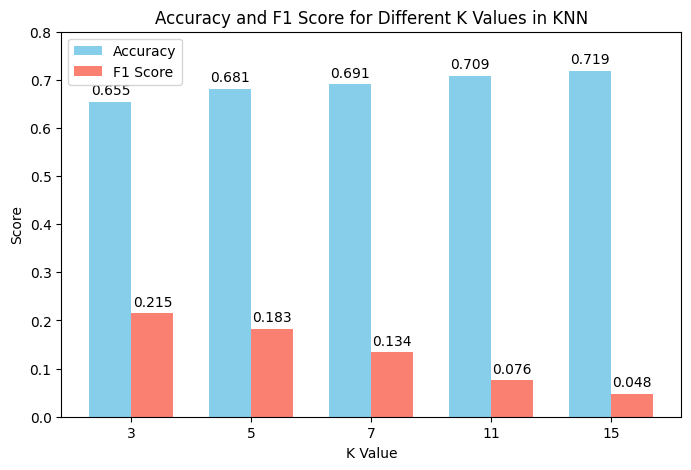

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Import the results of different K values
test_ks = [3, 5, 7, 11, 15]
accuracy = [0.655, 0.681, 0.691, 0.709, 0.719]
f1 = [0.215, 0.183, 0.134, 0.076, 0.048]

# set the graph
x = np.arange(len(test_ks))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))

# create two columns
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, f1, width, label='F1 Score', color='salmon')

# labels and title
ax.set_xlabel('K Value')
ax.set_ylabel('Score')
ax.set_title('Accuracy and F1 Score for Different K Values in KNN')
ax.set_xticks(x)
ax.set_xticklabels(test_ks)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 0.8)
plt.show()

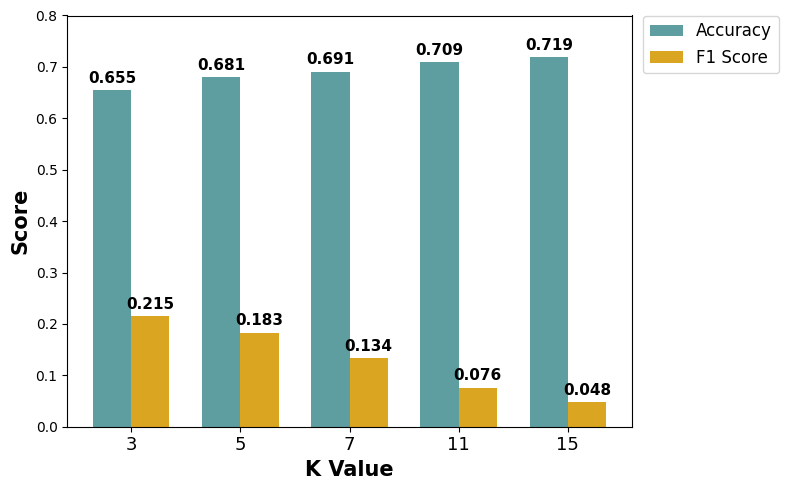

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Import the results of different K values
test_ks = [3, 5, 7, 11, 15]
accuracy = [0.655, 0.681, 0.691, 0.709, 0.719]
f1 = [0.215, 0.183, 0.134, 0.076, 0.048]

# Set the graph
x = np.arange(len(test_ks))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

# Create grouped bars
rects1 = ax.bar(
    x - width/2, accuracy, width,
    label='Accuracy', color='cadetblue'
)
rects2 = ax.bar(
    x + width/2, f1, width,
    label='F1 Score', color='goldenrod'
)

# Axis labels (larger + bold)
ax.set_xlabel('K Value', fontsize=15, fontweight='bold')
ax.set_ylabel('Score', fontsize=15, fontweight='bold')

# X ticks
ax.set_xticks(x)
ax.set_xticklabels(test_ks, fontsize=13)

# Legend moved away from bars
ax.legend(
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)

# Value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.3f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold'
        )

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 0.8)
plt.tight_layout()
plt.show()


In [ ]:
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4291  893]
 [1544  333]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      5184
           1       0.27      0.18      0.21      1877

    accuracy                           0.65      7061
   macro avg       0.50      0.50      0.50      7061
weighted avg       0.61      0.65      0.63      7061



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'df' is not defined

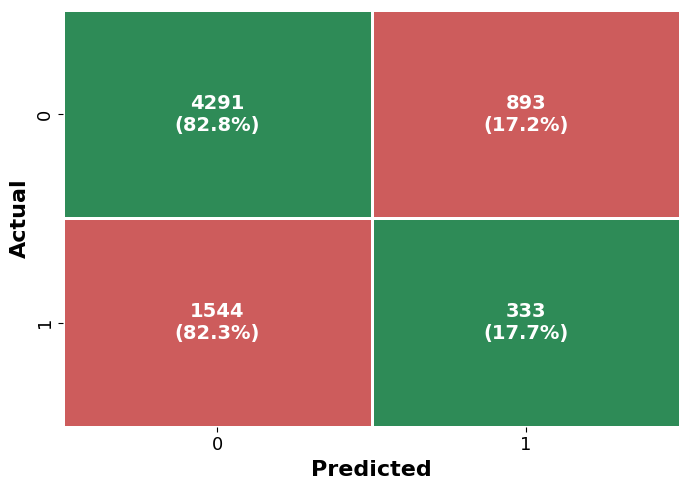

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ensure consistent class order: non-obese (0), obese (1)
classes = [0, 1]

# Confusion matrix (rows = Actual, cols = Predicted)
cm = confusion_matrix(y_test, y_pred, labels=classes)

# Row-wise percentages (within actual class)
row_sums = cm.sum(axis=1, keepdims=True)
cm_pct = np.divide(cm, row_sums, out=np.zeros_like(cm, dtype=float), where=row_sums != 0) * 100

# Cell annotations: frequency on top, percentage below
annot = np.array([
    [f"{cm[i, j]}\n({cm_pct[i, j]:.1f}%)" for j in range(cm.shape[1])]
    for i in range(cm.shape[0])
])

# Masks for correct vs incorrect cells
correct_mask = np.ones_like(cm, dtype=bool)
correct_mask[0, 0] = False
correct_mask[1, 1] = False

incorrect_mask = np.ones_like(cm, dtype=bool)
incorrect_mask[0, 1] = False
incorrect_mask[1, 0] = False

plt.figure(figsize=(7, 5))

# Correct predictions (green)
ax = sns.heatmap(
    cm,
    mask=correct_mask,
    cmap=sns.color_palette(["seagreen"]),
    annot=annot,
    fmt="",
    cbar=False,
    xticklabels=classes,
    yticklabels=classes,
    linewidths=1,
    linecolor="white",
    annot_kws={"size": 14, "weight": "bold"}
)

# Incorrect predictions (red)
sns.heatmap(
    cm,
    mask=incorrect_mask,
    cmap=sns.color_palette(["indianred"]),
    annot=annot,
    fmt="",
    cbar=False,
    xticklabels=classes,
    yticklabels=classes,
    linewidths=1,
    linecolor="white",
    annot_kws={"size": 14, "weight": "bold"},
    ax=ax
)

# Axis labels only (no title)
ax.set_xlabel("Predicted", fontsize=16, fontweight="bold")
ax.set_ylabel("Actual", fontsize=16, fontweight="bold")

# Tick label sizes
ax.tick_params(axis="both", labelsize=13)

plt.tight_layout()
plt.show()


